# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

sto = cv2.imread('100zloty.jpg')

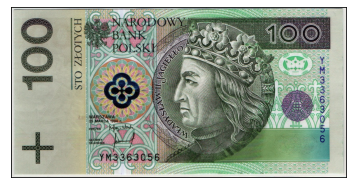

In [2]:
plt.imshow(sto)
plt.xticks([]), plt.yticks([])
plt.show()

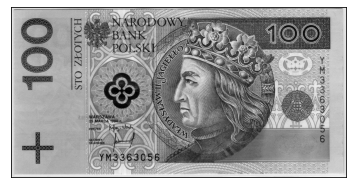

In [3]:
sto_bw = cv2.cvtColor(sto, cv2.COLOR_BGR2GRAY)
plt.imshow(sto_bw)
plt.xticks([]), plt.yticks([])
plt.gray()
plt.show()

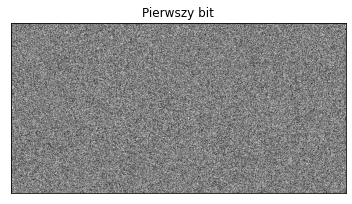

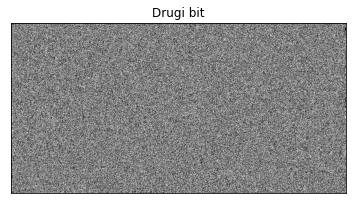

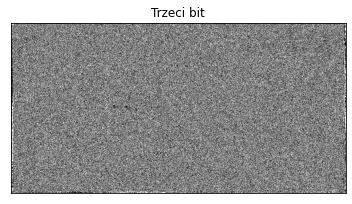

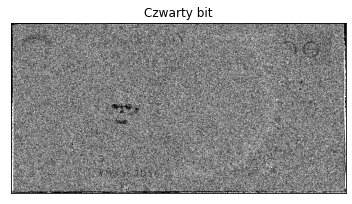

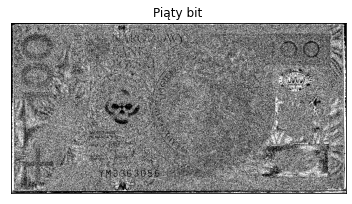

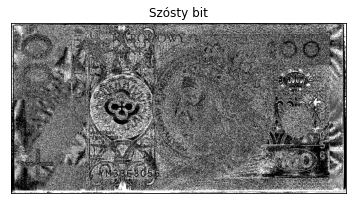

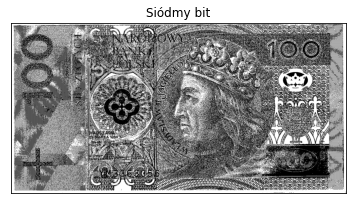

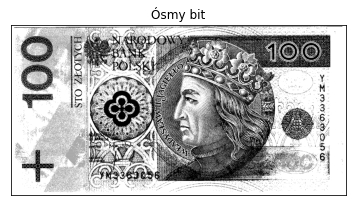

In [4]:
mask_1bit = np.zeros(shape=sto_bw.shape, dtype = 'uint8')
mask_1bit.fill(0b00000001) 
sto_1bit = np.bitwise_and(sto_bw, mask_1bit) #zeruję wszystkie bity poza pierwszym (od prawej - 2^0)
plt.imshow(sto_1bit)
plt.xticks([]), plt.yticks([])
plt.title("Pierwszy bit")
plt.show()

mask_2bit = np.zeros(shape=sto_bw.shape, dtype = 'uint8')
mask_2bit.fill(0b00000010)
sto_2bit = np.bitwise_and(sto_bw, mask_2bit) #zeruję wszystkie bity poza drugim (od prawej - 2^1)
sto_2bit = sto_2bit / 2
plt.imshow(sto_2bit)
plt.xticks([]), plt.yticks([])
plt.title("Drugi bit")
plt.show()

mask_3bit = np.zeros(shape=sto_bw.shape, dtype = 'uint8')
mask_3bit.fill(0b00000100)
sto_3bit = np.bitwise_and(sto_bw, mask_3bit) #zeruję wszystkie bity poza trzecim (od prawej - 2^2)
sto_3bit = sto_3bit / 4
plt.imshow(sto_3bit)
plt.xticks([]), plt.yticks([])
plt.title("Trzeci bit")
plt.show()

mask_4bit = np.zeros(shape=sto_bw.shape, dtype = 'uint8')
mask_4bit.fill(0b00001000)
sto_4bit = np.bitwise_and(sto_bw, mask_4bit) #zeruję wszystkie bity pozaw czwartym (od prawej - 2^3)
sto_4bit = sto_4bit / 8
plt.imshow(sto_4bit)
plt.xticks([]), plt.yticks([])
plt.title("Czwarty bit")
plt.show()

mask_5bit = np.zeros(shape=sto_bw.shape, dtype = 'uint8')
mask_5bit.fill(0b00010000)
sto_5bit = np.bitwise_and(sto_bw, mask_5bit) #zeruję wszystkie bity poza piątym (od prawej - 2^4)
sto_5bit = sto_5bit / 16
plt.imshow(sto_5bit)
plt.xticks([]), plt.yticks([])
plt.title("Piąty bit")
plt.show()

mask_6bit = np.zeros(shape=sto_bw.shape, dtype = 'uint8')
mask_6bit.fill(0b00100000)
sto_6bit = np.bitwise_and(sto_bw, mask_6bit) #zeruję wszystkie bity poza szóstym (od prawej - 2^5)
sto_6bit = sto_6bit / 32
plt.imshow(sto_6bit)
plt.xticks([]), plt.yticks([])
plt.title("Szósty bit")
plt.show()

mask_7bit = np.zeros(shape=sto_bw.shape, dtype = 'uint8')
mask_7bit.fill(0b01000000)
sto_7bit = np.bitwise_and(sto_bw, mask_7bit) #zeruję wszystkie bity poza siódmym (od prawej - 2^6)
sto_7bit = sto_7bit / 64
plt.imshow(sto_7bit)
plt.xticks([]), plt.yticks([])
plt.title("Siódmy bit")
plt.show()

mask_8bit = np.zeros(shape=sto_bw.shape, dtype = 'uint8')
mask_8bit.fill(0b10000000)
sto_8bit = np.bitwise_and(sto_bw, mask_8bit) #zeruję wszystkie bity poza ósmym (od prawej - 2^7)
sto_8bit = sto_8bit / 128
plt.imshow(sto_8bit)
plt.xticks([]), plt.yticks([])
plt.title("Ósmy bit")
plt.show()

Powyżej obraz został rozłożony na poszczególne plaszczyzny bitowe - wyraźnie widać, że najistotniejsze elementy obrazu zawarte są w ósmej płaszczyźnie, kolejno siódmej, szóstej, itd.

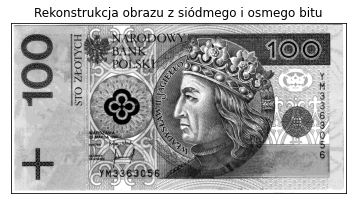

In [5]:
sto_78 = sto_7bit * 64 + sto_8bit * 128
plt.imshow(sto_78)
plt.xticks([]), plt.yticks([])
plt.title("Rekonstrukcja obrazu z siódmego i osmego bitu")
plt.show()

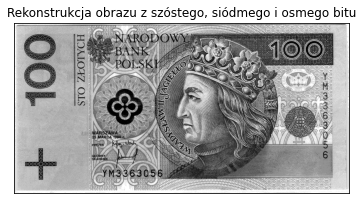

In [6]:
sto_678 = sto_6bit * 32 + sto_7bit * 64 + sto_8bit * 128
plt.imshow(sto_678)
plt.xticks([]), plt.yticks([])
plt.title("Rekonstrukcja obrazu z szóstego, siódmego i osmego bitu")
plt.show()

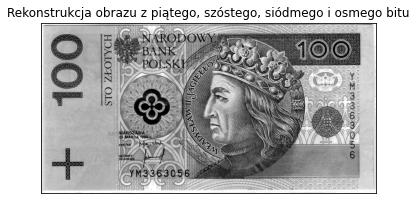

In [7]:
sto_5678 = sto_5bit * 16 + sto_6bit * 32 + sto_7bit * 64 + sto_8bit * 128
plt.imshow(sto_678)
plt.xticks([]), plt.yticks([])
plt.title("Rekonstrukcja obrazu z piątego, szóstego, siódmego i osmego bitu")
plt.show()

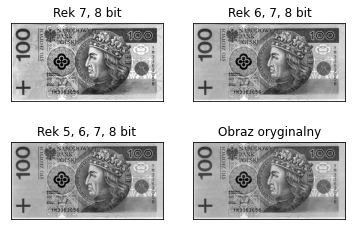

In [8]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_title('Rek 7, 8 bit')
ax1.imshow(sto_78)
ax1.set_xticks([]), ax1.set_yticks([])
ax2.set_title('Rek 6, 7, 8 bit')
ax2.imshow(sto_678)
ax2.set_xticks([]), ax2.set_yticks([])
ax3.set_title('Rek 5, 6, 7, 8 bit')
ax3.set_xticks([]), ax3.set_yticks([])
ax3.imshow(sto_5678)
ax4.set_title('Obraz oryginalny')
ax4.set_xticks([]), ax4.set_yticks([])
ax4.imshow(sto_bw)

plt.show()

Powyższe porównanie ukazuje, że rekonstrukcja obrazu już z dwóch bitów (7 i 8) dała bardzo zadowalający rezultat. Dodawanie kolejnych bitów poprawia sytuację, jednak nieznacznie. Wszystkie rekonstrukcje sa bardzo zbliżone do oryginału.

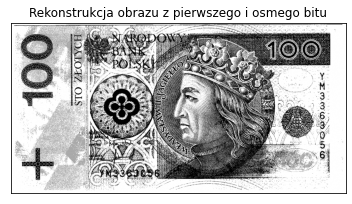

In [9]:
sto_18 = sto_1bit + sto_8bit * 128
plt.imshow(sto_18)
plt.xticks([]), plt.yticks([])
plt.title("Rekonstrukcja obrazu z pierwszego i osmego bitu")
plt.show()

Dodanie pierwszego bitu nie zmieniło praktycznie nic (w odróżnieniu od sumowania z siódmym bitem, który znacząco przybliżył rezultat do oryginału).

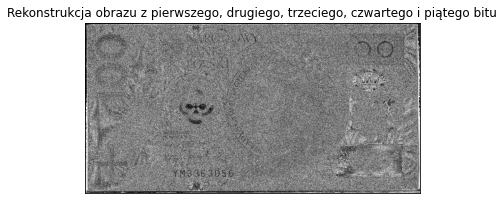

In [11]:
sto_12345 = sto_1bit + sto_2bit * 2 + sto_3bit * 4 + sto_4bit * 8 + sto_5bit * 16
plt.imshow(sto_12345)
plt.xticks([]), plt.yticks([])
plt.title("Rekonstrukcja obrazu z pierwszego, drugiego, trzeciego, czwartego i piątego bitu")
plt.show()

Zgodnie z oczekiwaniami, rekonstrukcja z pierwszych pięciu bitów dała bardzo słaby rezultat.